# **Data Preprocessing and Gender-Based Categorization**

In [ ]:
# Mount Google Drive to access files stored there
from google.colab import drive
drive.mount('/content/drive')

# Import necessary library
import pandas as pd

# Define the file path to your CSV within your Google Drive
file_path = '/content/drive/My Drive/amazon_products.csv'

# Initialize accumulators for metrics
total_stars = pd.Series([0, 0, 0], index=["Men's", "Women's", "Unspecified"])
total_reviews = pd.Series([0, 0, 0], index=["Men's", "Women's", "Unspecified"])
best_sellers_count = {"Men's": 0, "Women's": 0, "Unspecified": 0}
count_entries = {"Men's": 0, "Women's": 0, "Unspecified": 0}
gender_counts = pd.Series([0, 0, 0], index=["Men's", "Women's", "Unspecified"])

# Define the function to classify gender using keywords
def classify_gender(title):
    # Handle missing or non-string values
    if not isinstance(title, str):
        return "Unspecified"

    men_keywords = ['men', 'man', 'mens', 'male', 'gentlemen', 'boys', 'boy']
    women_keywords = ['women', 'woman', 'womens', 'female', 'ladies', 'girls', 'girl', 'femme', 'lady']
    title_lower = title.lower()
    if any(keyword in title_lower for keyword in men_keywords):
        return "Men's"
    elif any(keyword in title_lower for keyword in women_keywords):
        return "Women's"
    else:
        return "Unspecified"

# Process the data in chunks
chunksize = 2000000  # Adjust based on performance
for chunk in pd.read_csv(file_path, chunksize=chunksize):
    # Classify products by gender
    chunk['gender_category'] = chunk['title'].apply(classify_gender)

    # Update gender counts
    gender_counts = gender_counts.add(chunk['gender_category'].value_counts(), fill_value=0)

    # Update metrics using .add() with fill_value=0
    total_stars = total_stars.add(chunk.groupby('gender_category')['stars'].sum(), fill_value=0)
    total_reviews = total_reviews.add(chunk.groupby('gender_category')['reviews'].sum(), fill_value=0)

    for gender in best_sellers_count:
        best_sellers_count[gender] += chunk[chunk['isBestSeller'] & (chunk['gender_category'] == gender)].shape[0]
        count_entries[gender] += chunk[chunk['gender_category'] == gender].shape[0]

# Calculate average ratings by gender category
average_ratings = {gender: (total_stars[gender] / count_entries[gender])
                   for gender in count_entries if count_entries[gender] > 0}

# Display the results
print("Total Products by Gender Category:")
print(gender_counts)
print("\nAverage Ratings by Gender Category:", average_ratings)
print("Total Reviews by Gender Category:", total_reviews)
print("Number of Best-Sellers by Gender Category:", best_sellers_count)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total Products by Gender Category:
Men's          434660
Unspecified    937030
Women's         54647
dtype: int64

Average Ratings by Gender Category: {"Men's": 4.022945060507063, "Women's": 3.942139550204037, 'Unspecified': 3.9919877698686275}
Total Reviews by Gender Category: Men's           70911825
Unspecified    174440245
Women's         12459512
dtype: int64
Number of Best-Sellers by Gender Category: {"Men's": 2411, "Women's": 247, 'Unspecified': 5862}


# **Bar Chart of Average Ratings by Gender Category**
**Description:** This visualization compares the average product ratings across the three gender categories: "Men's", "Women's", and "Unspecified".

**Purpose:** It helps identify which category has higher customer satisfaction based on average ratings.

<ipython-input-23-9d35a9c7eba3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=avg_ratings, palette=color_palette)


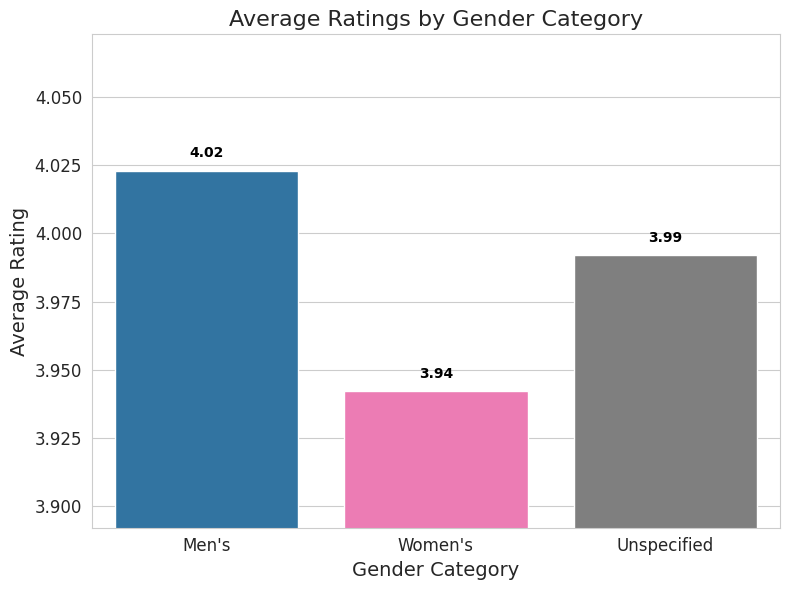

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
categories = list(average_ratings.keys())
avg_ratings = list(average_ratings.values())

# Set Seaborn style
sns.set_style("whitegrid")

# Define custom color palette
color_palette = {'Men\'s': '#1f77b4',    # Blue
                 'Women\'s': '#ff69b4',  # Pink
                 'Unspecified': '#7f7f7f'}  # Gray

# Create bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(x=categories, y=avg_ratings, palette=color_palette)

# Add data labels
for i, v in enumerate(avg_ratings):
    ax.text(i, v + 0.005, f"{v:.2f}", color='black', ha='center', fontweight='bold')

# Customize the plot
plt.title('Average Ratings by Gender Category', fontsize=16)
plt.xlabel('Gender Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.ylim(min(avg_ratings) - 0.05, max(avg_ratings) + 0.05)  # Adjust y-axis limits for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# **Pie Chart of Total Products by Gender Category**

**Description:** Shows the proportion of total products in each gender category.

**Purpose:** This helps visualize the distribution and market focus of the dataset.

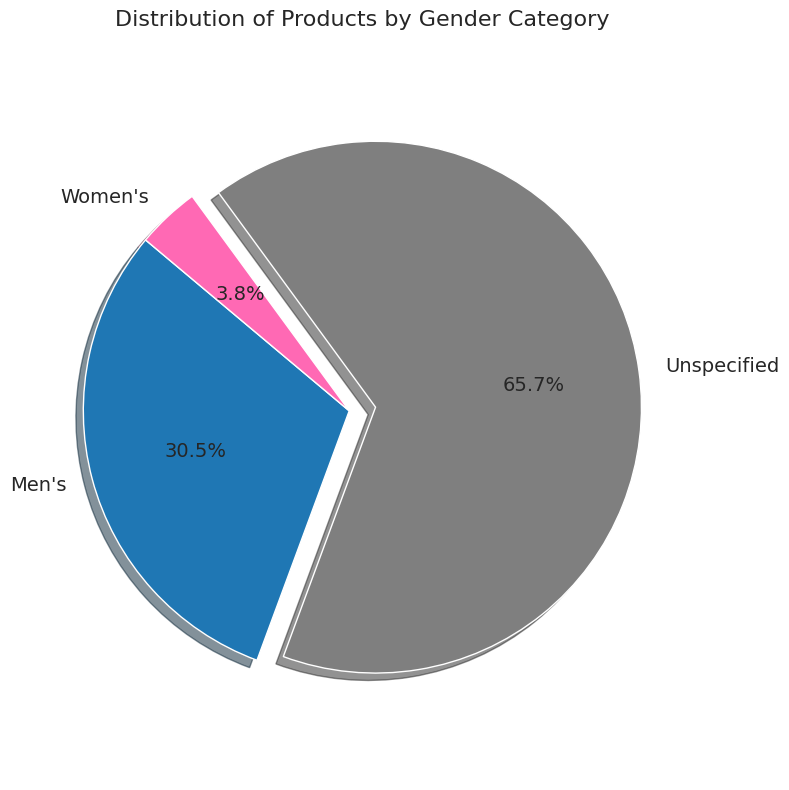

In [24]:
import matplotlib.pyplot as plt

# Prepare data
total_products = gender_counts.values
labels = gender_counts.index

# Ensure labels are strings
labels = [str(label) for label in labels]

# Define colors corresponding to categories
colors = [color_palette[label] for label in labels]

# Explode the smallest slice (Women's) for emphasis (optional)
explode = [0, 0.1, 0] if 'Women\'s' in labels else [0, 0, 0]  # Adjust if necessary

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(total_products, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140,
        explode=explode, shadow=True, textprops={'fontsize': 14})

plt.title('Distribution of Products by Gender Category', fontsize=16)
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# **Bar Chart of Number of Best-Sellers by Gender Category**
**Description:** Compares the number of best-selling products across gender categories.

**Purpose:** Highlights which categories have more best-*selling* items, indicating market trends or customer preferences.

<ipython-input-25-82df026254ba>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=best_sellers, y=categories, palette=color_palette)


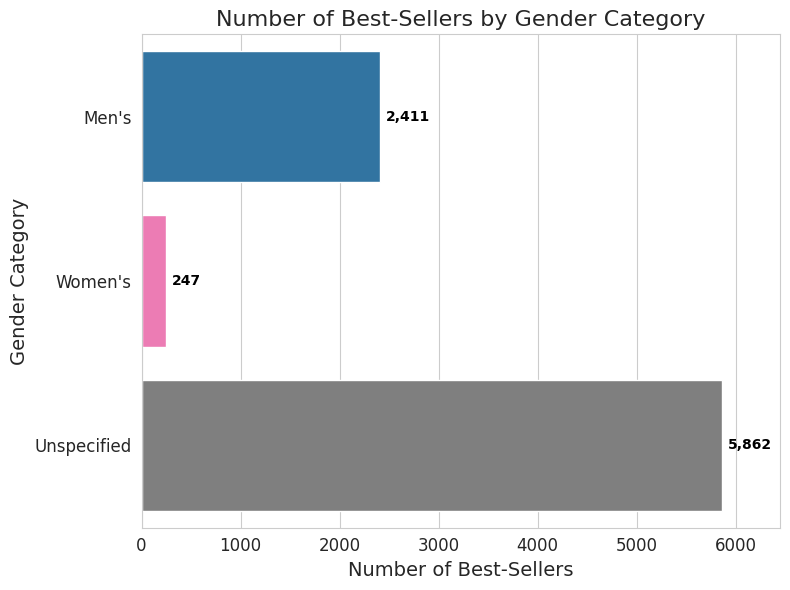

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
categories = list(best_sellers_count.keys())
best_sellers = list(best_sellers_count.values())

# Set Seaborn style
sns.set_style("whitegrid")

# Create horizontal bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(x=best_sellers, y=categories, palette=color_palette)

# Add data labels
for i, v in enumerate(best_sellers):
    ax.text(v + max(best_sellers)*0.01, i, f"{v:,}", color='black', va='center', fontweight='bold')

# Customize the plot
plt.title('Number of Best-Sellers by Gender Category', fontsize=16)
plt.xlabel('Number of Best-Sellers', fontsize=14)
plt.ylabel('Gender Category', fontsize=14)
plt.xlim(0, max(best_sellers) * 1.1)  # Add 10% padding to x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
